## Introdução a Redes Neurais Multicamadas

### Objetivos

  - Praticar os algoritmos de multilayer Perceptron (MLP)
  - Conhecer uma intuição sobre função de ativação, backpropagation 
  - Conhecer e praticar o framework TensorFlow 
  

### Implementação de uma rede Multilayer Perceptron 

Vamos usar um framework de machine learnning chamado TensorFlow/keras para fazer esta implementação.


In [ ]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importe as bibliotecas necessárias: TensorFlow, Keras, NumPy e Pandas.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

**Carregue o conjunto de dados iris do UCI**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, header=None, names=col_names)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Converta as classes de flor em valores numéricos**

In [ ]:
data['class'] = pd.Categorical(data['class'])
data['class'] = data['class'].cat.codes
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Divida o conjunto de dados em conjuntos de treinamento e teste**

In [ ]:
x = data.drop('class',axis=1)
y = data['class']

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)

**Crie o modelo de rede neural com uma camada de entrada, uma camada oculta e uma camada de saída**

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

Este trecho de código define uma rede neural sequencial usando a API Keras do TensorFlow.

A rede neural é criada usando a classe Sequential do Keras, que é uma pilha linear de camadas de rede. Nesse caso, a rede tem duas camadas:

* Uma camada densa (fully connected) com 10 neurônios, uma entrada (input) de 4 dimensões (o número de características do conjunto de dados Iris) e uma função de ativação ReLU. A camada densa é criada usando a classe Dense do Keras.

* Uma camada densa com 3 neurônios (uma para cada classe do conjunto de dados Iris), uma função de ativação softmax e sem especificar uma entrada, pois ela herda a saída da camada anterior.

A camada de entrada é especificada pela primeira camada densa e seu formato é definido pelo parâmetro input_shape=(4,), que indica que a entrada tem 4 dimensões (que corresponde ao número de características do conjunto de dados Iris).

A camada de saída é a segunda camada densa com 3 neurônios, correspondendo às 3 classes no conjunto de dados Iris.

A função de ativação ReLU é usada na camada de entrada para adicionar não linearidade aos dados de entrada. A função ReLU é definida como max(x, 0), o que significa que a saída da camada é 0 para todos os valores de entrada negativos e é igual à entrada para valores de entrada positivos.

A função de ativação softmax é usada na camada de saída para converter as saídas da rede em uma distribuição de probabilidade sobre as 3 classes do conjunto de dados Iris.

Em resumo, essa rede neural sequencial tem uma camada de entrada com 10 neurônios, uma camada oculta com uma função de ativação ReLU e uma camada de saída com 3 neurônios e uma função de ativação softmax.

**Compile o modelo, definindo a função de perda, o otimizador e as métricas**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Este trecho de código compila o modelo de rede neural sequencial definido anteriormente, definindo as configurações de treinamento do modelo. A função compile do Keras é usada para compilar o modelo.

Os argumentos do compile são:

* optimizer: Otimizador usado para atualizar os pesos da rede durante o treinamento. Neste caso, usamos o otimizador 'adam', que é uma variação do otimizador estocástico de descida de gradiente (SGD) que adapta a taxa de aprendizado durante o treinamento.

* loss: Função de perda usada para medir o quão bem o modelo está aprendendo durante o treinamento. Neste caso, usamos a função de perda 'sparse_categorical_crossentropy', que é uma função de perda adequada para problemas de classificação multiclasse em que as classes são representadas como inteiros.

* metrics: Métricas usadas para avaliar o desempenho do modelo durante o treinamento. Neste caso, usamos a métrica 'accuracy', que é a proporção de exemplos classificados corretamente em relação ao número total de exemplos.

O objetivo do treinamento da rede neural é minimizar a função de perda durante o treinamento usando o otimizador especificado. O modelo é avaliado em relação à métrica de precisão durante o treinamento para monitorar o desempenho do modelo.

Uma vez compilado, o modelo pode ser treinado usando o método fit do Keras, passando os dados de treinamento e as etiquetas, juntamente com as configurações de treinamento definidas no compile.

**Treine o modelo com os dados de treinamento**

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.2996 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2403 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2005 - accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1577 - accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1291 - accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1078 - accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0892 - accuracy: 0.3333
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0764 - accuracy: 0.3333
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0606 - accuracy: 0.3583
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0448 - accuracy: 0.3667
Epoch 11/100
4/4 [===========

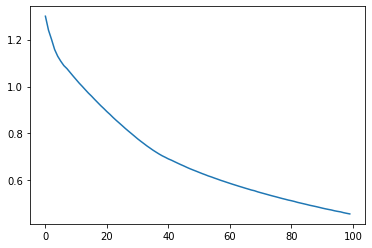

In [ ]:
history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();

**Avalie o modelo com os dados de teste**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 136ms/step - loss: 0.4586 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


**Use o modelo para fazer previsões**

In [ ]:
predictions = model.predict(x_test)
print(predictions)

1/1 [==============================] - 0s 50ms/step
[[0.8628428  0.09721085 0.03994625]
 [0.8265829  0.12519614 0.04822098]
 [0.83597356 0.11764347 0.04638291]
 [0.8230422  0.12945542 0.04750237]
 [0.83708215 0.11911797 0.04379988]
 [0.7524843  0.16967383 0.07784189]
 [0.02384778 0.35263616 0.6235161 ]
 [0.05172445 0.50885695 0.4394186 ]
 [0.00226575 0.21229841 0.785436  ]
 [0.09458465 0.5408608  0.36455458]
 [0.10069584 0.5230364  0.37626776]
 [0.1667624  0.5560414  0.27719608]
 [0.06873146 0.44631204 0.48495644]
 [0.8176722  0.12543371 0.05689413]
 [0.06171841 0.4578918  0.48038974]
 [0.01492975 0.32184505 0.66322523]
 [0.02995726 0.41728884 0.55275387]
 [0.01641167 0.36206663 0.62152165]
 [0.80297524 0.13259037 0.06443436]
 [0.11248949 0.5426674  0.34484306]
 [0.10557672 0.5281135  0.36630973]
 [0.01692021 0.30277875 0.680301  ]
 [0.09080798 0.5424223  0.36676985]
 [0.01513701 0.31115398 0.673709  ]
 [0.03117158 0.41532254 0.55350584]
 [0.02321881 0.36086592 0.61591536]
 [0.02478067

Ao usar o modelo treinado para fazer previsões com model.predict(test_features), os valores de saída serão probabilidades de cada uma das três classes (setosa, versicolor e virginica) para cada entrada do conjunto de teste. Para converter essas probabilidades em uma classe de flor, você pode usar a função argmax da biblioteca NumPy. A função argmax retorna o índice do valor máximo em um array. Como as classes foram codificadas anteriormente como 0, 1 e 2, o índice máximo corresponderá à classe prevista.

Aqui está um exemplo de como converter as probabilidades em classes de flor:

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

# Decode class values
class_names = ['setosa', 'versicolor', 'virginica']
predicted_class_names = [class_names[i] for i in predicted_classes]

# Print example predictions
print("Example predictions:")
for i in range(10):
    print(f"Predicted class: {predicted_class_names[i]}, True class: {class_names[y_test.iloc[i]]}")


Example predictions:
Predicted class: setosa, True class: setosa
Predicted class: setosa, True class: setosa
Predicted class: setosa, True class: setosa
Predicted class: setosa, True class: setosa
Predicted class: setosa, True class: setosa
Predicted class: setosa, True class: setosa
Predicted class: virginica, True class: virginica
Predicted class: versicolor, True class: versicolor
Predicted class: virginica, True class: virginica
Predicted class: versicolor, True class: versicolor


Nesse exemplo, np.argmax(predictions, axis=1) retorna uma matriz com o índice da classe com a probabilidade mais alta para cada entrada do conjunto de teste. Em seguida, o código usa essa matriz de índices para decodificar as classes previstas de volta em seus valores de string originais (class_names). O exemplo de código imprime as previsões para as primeiras 10 entradas do conjunto de teste, juntamente com a verdadeira classe correspondente.

In [ ]:
from sklearn.metrics import classification_report

# Get classification report
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.73      0.84        11
   virginica       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



### Desafio: Implementação end-to-end MLP

Realize o treinamento de uma rede MLP para o dataset Fashion MNIST. Um guia passo a passo pode ser encontrado no link https://www.tensorflow.org/tutorials/keras/classification. 

In [ ]:
### Seu código aqui.....